<h1>Regressão Linear em Machine learning</h1>

A regressão linear é uma técnica estatística que busca estabelecer a relação entre uma ou mais variáveis independentes (X) e uma variável dependente (y), modelando essa relação através de uma equação linear.

Ela constantemente aparece no contexto de introdução a **machine learning**. Isso acontece porque é um algoritmo relativamente simples pra se implementar, exige uma base matemática menos complexa (principalmente pra quem vem da estatística e da álgebra linear) e ainda introduz conceitos essenciais para tópicos mais avançados de inteligência artificial, como overfitting, funções de custo, otimização e etc...

<h1>Recapitulação de equações da reta</h1>
As equações lineares são aquelas que possuem variáveis com expoente igual a 1, como por exemplo a equação:

$y = 8x - 2$

**(se a equação fosse $y = 8x² - 2$ ela deixaria de ser linear)**

Ok, mas o que isso tem a ver com retas? Bem, essa equação nos diz que **y** depende do valor de **x**, ou seja, y seria uma função de x. Quando atribuímos um valor a x, consequentemente estamos atribuindo um valor a y. Vamos ver isso acontecendo:

Se dermos ao x o valor de 1, o y será igual a 6, porque:

$$y = 8(1) - 2$$
$$y = 8 - 2$$
$$y = 6$$

Se dermos ao x o valor de 2, o y será igual a 14, porque:

$$y = 8(2) - 2$$
$$y = 16 - 2$$
$$y = 14$$

E por aí vai...

Quando colocamos isso em um gráfico vemos que isso vira uma reta:

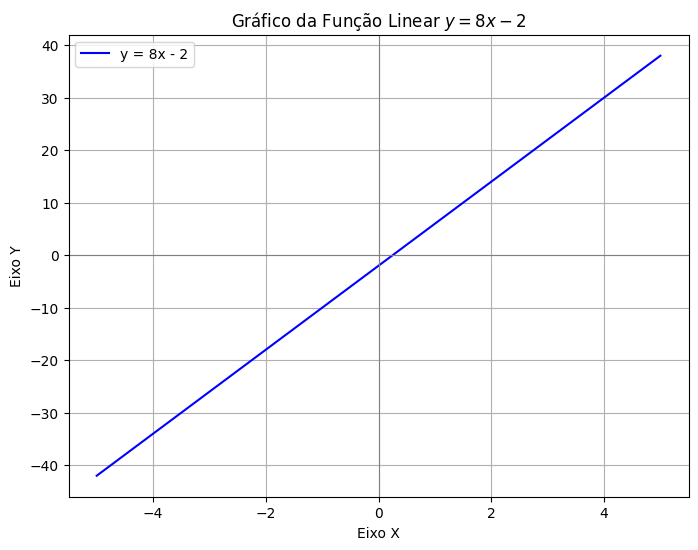

Agora que já entendemos como essas equações se relacionam com gráficos, vejamos algumas terminologias importantes:

<hr>

$$y = ax + b$$
<hr>

**y: variável dependente**

**x: variável independente**

**a: coeficiente angular**

**y: coeficiente linear (intercepto)**

O intercepto é onde a reta corta o eixo y (no caso da equação que colocamos no gráfico o intercepto é $(0, -2)$), já o coeficiente angular representa a variação de y em relação a variação de x. No caso da nossa equação a variação é de 8 (de -2 até 6 temos 8 posições, de 6 até 14 temos 8 posições e etc...)



<h1>Importância dos coeficientes</h1>

Até aqui deu pra perceber que não é só o **x** que influencia o **y**. Os coeficientes também têm um papel crucial no resultado final, e indo mais fundo podemos dizer que o coeficiente angular (intercepto) define o impacto que x terá sobre y. Se você já está familiarizado com alguns termos de *machine learning* deve ter notado que o coeficiente angular equivale ao peso (w) e o intercepto equivale ao viés (b).

<h2>Base de dados com relações lineares</h2>


Aqui é onde nós criamos uma base de dados fictícia. O x corresponde as variáveis independentes que nesse caso é um conjunto de 100 números aleatórios de 1 a 10, já o y representa os valores que tentaremos prever.

Pra trazer isso pra realidade poderíamos usar a analogia de que essa base de dados é um relatório de um vendedor de frutas. O x representa a quantidade investida em divulgação em cada um dos 100 dias, e o y representa o faturamento em cada dia.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dados simulados
np.random.seed(0)
x = np.random.rand(100) * 8 # 100 valores entre 0 e 8
y = 2 * x + 50 + np.random.randn(100) # y real + ruído que imita a vida real
pd.DataFrame({"x-valor-divulgação": x, "y-faturamento": y}).head(10) # as primeiras 10 linhas do conjunto de dados

,x-valor-divulgação,y-faturamento
0,4.390508,57.615866
1,5.721515,62.343856
2,4.822107,60.109876
3,4.359065,57.181887
4,3.389238,58.266729
5,5.167153,62.230195
6,3.500698,58.180175
7,7.134184,64.088443
8,7.709302,64.347852
9,3.067532,57.189516


É possível perceber que isso se trata da equação da reta *y = 2x + 3 + (ruído aleatório)*. Podemos, inclusive, ver isso na forma de um gráfico:

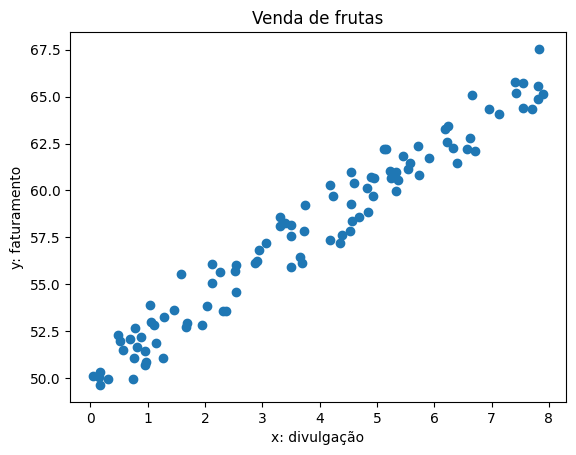

In [ ]:
plt.scatter(x, y)
plt.xlabel("x: divulgação")
plt.ylabel("y: faturamento")
plt.title("Venda de frutas")
plt.show()

Nosso objetivo, nesse caso, é simples: sabemos que esses dados seguem uma relação linear, mas queremos traçar uma reta que cubra todos esses pontos, ou pelo menos passe muito próxima de todos eles. Isso parece uma tarefa boba, já que é só fazer uma reta com a equação $y = 2 * x + 50$, que usamos pra criar o conjunto de dados, certo?

O problema é que na vida real quase nunca temos um número exato que mostra exatamente como o **x** altera o **y**, nunca é tão previsível a forma como o investimento em divulgação interfere no faturamento de um vendedor de frutas. Por isso nós vamos partir do pressuposto que não sabemos o valor de **w** e nem o de **b**

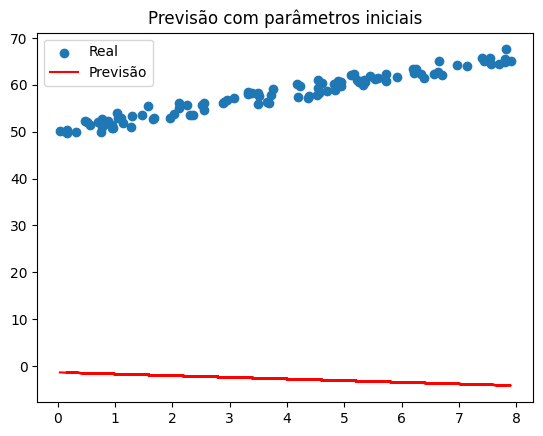

In [ ]:
w = np.random.randn() # 'w' (weight) seria o coeficiente linear
b = np.random.randn() # 'b' (bias) seria o intercepto

y_pred = w * x + b

plt.scatter(x, y, label="Real")
plt.plot(x, y_pred, color="red", label="Previsão")
plt.legend()
plt.title("Previsão com parâmetros iniciais")
plt.show()

Ok... tentamos prever os valores de y a partir de valores aleatórios para **w** e **b**, mas os resultados foram nitidamente catastróficos. Calculando o <a href="https://www.freecodecamp.org/portuguese/news/aprendizagem-da-maquina-uma-introducao-ao-erro-quadratico-medio-e-linhas-de-regressao/">Erro Quadrático Médio</a> nós percebemos que é um erro grande de aproximadamente 3687.

In [ ]:
def get_mse(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

mse = get_mse(y, y_pred)
print("MSE:", mse)

MSE: 3687.0041476491247


Para resolver essa situação nós precisamos usar o **Gradiente Descendente**, que atualiza **w** e **b** na direção que reduz o erro. Pra isso nós calculamos as derivadas parciais do MSE em relação a **w** e **b**.

Não precisa se assustar com os termos. Podemos ver isso na prática com esse código:

In [ ]:
def gradient_descent(x, y_real, y_pred, w, b, learning_rate=0.01):
    n = len(x)

    # Calcula os gradientes
    dw = (-2/n) * np.sum(x * (y_real - y_pred))  # Gradiente de w
    db = (-2/n) * np.sum(y_real - y_pred)        # Gradiente de b

    # Atualiza w e b
    w_new = w - learning_rate * dw
    b_new = b - learning_rate * db

    return w_new, b_new

Interpretando a função: Para sabermos a derivada parcial do mse em relação ao w (dw) dividimos -2 por **n** (n = quantidade de elementos no vetor x), depois multiplicamos esse valor pelo somatório dos elementos de x multiplicados pelo erro (valor correto para **y** - valor previsto pelo modelo).

Já para a derivada parcial do mse em relação a b (db) dividimos o -2 por **n**, depois multiplicamos esse valor pelo somatório do erro.

<hr>

Os novos valores para os coeficientes correspondem aos antigos valores menos a multiplicação do hiperparâmetro **learning_rate** pelas respectivas derivadas parciais.

 E o que seria o learning_rate? O **learning_rate** é um valor que determina o quanto o modelo ajusta os coeficientes a cada passo do treinamento. Ele é importante porque controla a velocidade de aprendizado: se for alto demais, pode instabilizar o modelo, e se for baixo demais, pode deixar o treinamento lento demais.

<h3>Treinamento do modelo</h3>

Aqui nós vamos treinar nosso modelos de fato. Para isso definimos o valor do learning_rate e do epochs (a quantidade de vezes que o **w** e o **b** serão ajustados). Dentro do laço de repetição nós faremos previsões usando os coeficientes que ainda não foram ajustados, em seguida usamos nossa função gradient_descent para ajusta-los.

In [ ]:
# Hiperparâmetros
learning_rate = 0.05
epochs = 250  # Número de vezes que os coeficientes serão ajustados

# Treinamento
for epoch in range(epochs):
    y_pred = w * x + b
    mse = get_mse(y, y_pred)
    print(f'valor de w na iteração {epoch}: {w}')
    print(f'valor de b na iteração {epoch}: {b}\n')
    w, b = gradient_descent(x, y, y_pred, w, b, learning_rate)

print(f"w final: {w:.2f}, b final: {b:.2f}")


valor de w na iteração 0: 2.0406070388966486
valor de b na iteração 0: 49.97389600114398

valor de w na iteração 1: 2.0393403966943184
valor de b na iteração 1: 49.98038082917235

valor de w na iteração 2: 2.038106841254915
valor de b na iteração 2: 49.98669626290198

valor de w na iteração 3: 2.0369055082981613
valor de b na iteração 3: 49.992846727188606

valor de w na iteração 4: 2.03573555612018
valor de b na iteração 4: 49.998836531303496

valor de w na iteração 5: 2.0345961650037854
valor de b na iteração 5: 50.00466987195272

valor de w na iteração 6: 2.0334865366441335
valor de b na iteração 6: 50.010350836217526

valor de w na iteração 7: 2.032405893589416
valor de b na iteração 7: 50.01588340441792

valor de w na iteração 8: 2.0313534786961296
valor de b na iteração 8: 50.02127145290146

valor de w na iteração 9: 2.0303285545985967
valor de b na iteração 9: 50.026518756759174

valor de w na iteração 10: 2.029330403192335
valor de b na iteração 10: 50.03162899247054

valor de 

<h3>Nova previsão com coeficientes ajustados</h3>

Agora que já ajustamos os coeficientes podemos fazer novas previsões. Como é possível ver nós conseguimos reduzir drasticamente o erro.

Erro Quadrático Médio: 0.9924386786071334



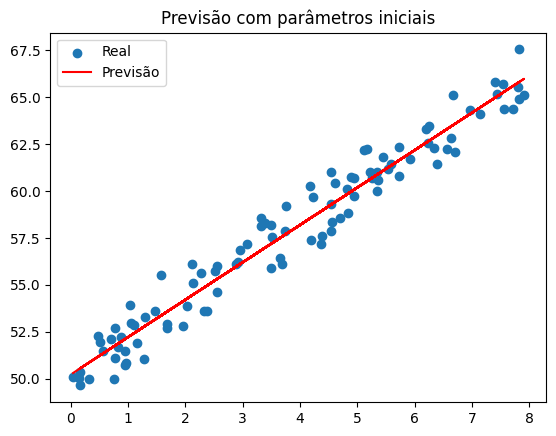

In [ ]:
y_pred = w * x + b

print(f'Erro Quadrático Médio: {get_mse(y, y_pred)}\n')
plt.scatter(x, y, label="Real")
plt.plot(x, y_pred, color="red", label="Previsão")
plt.legend()
plt.title("Previsão com parâmetros iniciais")
plt.show()

Uau! Nós fomos de um MSE de 3687 para um MSE de 0.99, graças ao treinamento com ajuste de coeficientes. Vejamos isso registro por registro:

In [ ]:
pd.DataFrame({"x-valor-divulgação": x, "faturamento-real": y, "faturamento-previsto": y_pred}).head(10) # as primeiras 10 linhas do conjunto de dados

,x-valor-divulgação,faturamento-real,faturamento-previsto
0,4.390508,57.615866,58.968509
1,5.721515,62.343856,61.620117
2,4.822107,60.109876,59.828333
3,4.359065,57.181887,58.905870
4,3.389238,58.266729,56.973798
5,5.167153,62.230195,60.515727
6,3.500698,58.180175,57.195845
7,7.134184,64.088443,64.434410
8,7.709302,64.347852,65.580150
9,3.067532,57.189516,56.332901


Com isso já podemos ter uma noção de como é a matemática por trás da essência do machine learning.